# Дюков Леонид 381908-1

### 30. Аппроксимация данных. Солнечная активность
http://www.sidc.be/silso/datafiles

Ниже представлены данные по солнечной активности (усредненные числа Вольфа) с 1900 по 2015 гг. Изобразить данные. Подобрать модель, аппроксимирующую их. Построить график полученной аппроксимирующей функции. Можно воспользоваться пребразованием Фурье, чтобы определить частоту колебаний в солнечной активности. На какой ближайший год придется следующий пик солнечной активности?

Читать по строкам (1900...2015):
  15.7 4.6 8.5 40.8 70.1 105.5 90.1 102.8 80.9
  73.2 30.9 9.5 6.0 2.4 16.1 79.0 95.0 173.6 134.6
  105.7 62.7 43.5 23.7 9.7 27.9 74.0 106.5 114.7
  129.7 108.2 59.4 35.1 18.6 9.2 14.6 60.2 132.8
  190.6 182.6 148.0 113.0 79.2 50.8 27.1 16.1 55.3
  154.3 214.7 193.0 190.7 118.9 98.3 45.0 20.1 6.6
  54.2 200.7 269.3 261.7 225.1 159.0 76.4 53.4
  39.9 15.0 22.0 66.8 132.9 150.0 149.4 148.0 94.4
  97.6 54.1 49.2 22.5 18.4 39.3 131.0 220.1 218.9
  198.9 162.4 91.0 60.5 20.6 14.8 33.9 123.0 211.1
  191.8 203.3 133.0 76.1 44.9 25.1 11.6 28.9 88.3
  136.3 173.9 170.4 163.6 99.3 65.3 45.8 24.7 12.6
  4.2 4.8 24.9 80.8 84.5 94.0 113.3 69.8


In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean
import scipy.constants as sc
from scipy.optimize import curve_fit
import numpy as np
%matplotlib inline

Запишем все данные в массив значение, все года в массив годов.

In [2]:
values = np.array([15.7, 4.6, 8.5, 40.8, 70.1, 105.5, 90.1, 102.8, 80.9, 73.2, 30.9, 9.5, 6.0, 2.4, 16.1, 79.0, 95.0, 173.6, 134.6, 105.7, 62.7, 43.5, 23.7, 9.7, 27.9, 74.0, 106.5, 114.7, 129.7, 108.2, 59.4, 35.1, 18.6, 9.2, 14.6, 60.2, 132.8, 190.6, 182.6, 148.0, 113.0, 79.2, 50.8, 27.1, 16.1, 55.3, 154.3, 214.7, 193.0, 190.7, 118.9, 98.3, 45.0, 20.1, 6.6, 54.2, 200.7, 269.3, 261.7, 225.1, 159.0, 76.4, 53.4, 39.9, 15.0, 22.0, 66.8, 132.9, 150.0, 149.4, 148.0, 94.4, 97.6, 54.1, 49.2, 22.5, 18.4, 39.3, 131.0, 220.1, 218.9, 198.9, 162.4, 91.0, 60.5, 20.6, 14.8, 33.9, 123.0, 211.1, 191.8, 203.3, 133.0, 76.1, 44.9, 25.1, 11.6, 28.9, 88.3, 136.3, 173.9, 170.4, 163.6, 99.3, 65.3, 45.8, 24.7, 12.6, 4.2, 4.8, 24.9, 80.8, 84.5, 94.0, 113.3, 69.8])
years  = np.arange(1900, 2016)

Для начала построим график исходных данных, что бы понять, как изменяется солнечная активность по годам

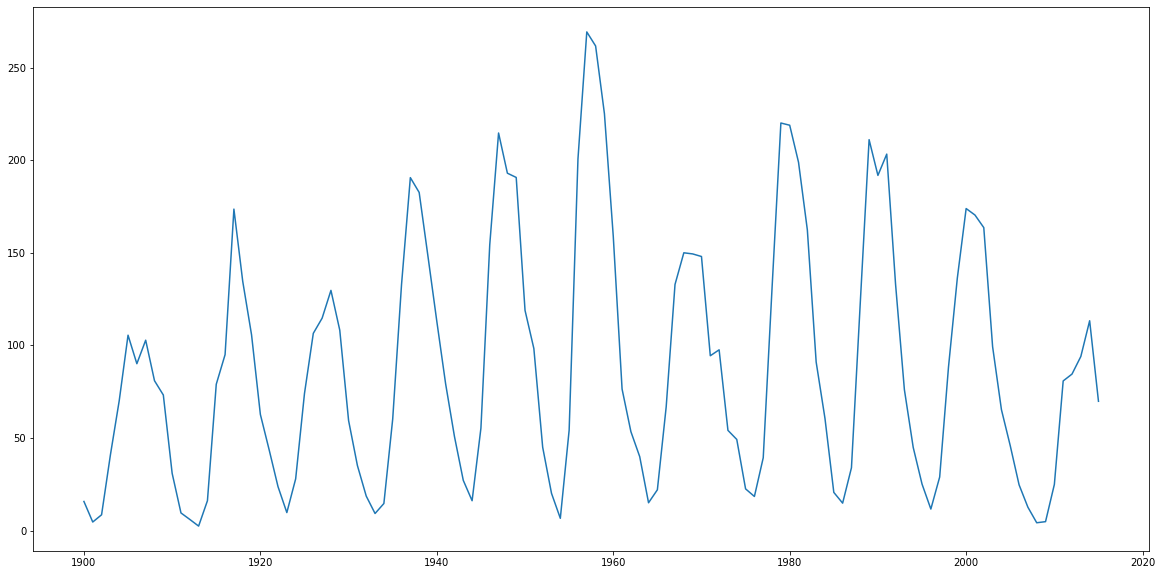

In [3]:
plt.figure(figsize=(20,10))
plt.plot(years, values)
pass

Можно заметить, что график очень похож на синусоиду. 

Найдем точки локальных минимумов и максимумов:

In [4]:
mins_years = np.array([])
mins_values = np.array([])

maxs_years = np.array([])
maxs_values = np.array([])

for prev, cur, next, y in zip(values[:-2], values[1:-1], values[2:], years[1:-1]):
    if (cur < next and cur < prev):
        mins_years = np.append(mins_years, y)
        mins_values = np.append(mins_values, cur)
    if (cur > next and cur > prev):
        maxs_years = np.append(maxs_years, y)
        maxs_values = np.append(maxs_values, cur)

        
print("Года с минимальной активностью:", mins_years.astype(int))
print("Года с максимальной активностью:", maxs_years.astype(int))

Года с минимальной активностью: [1901 1906 1913 1923 1933 1944 1954 1964 1971 1976 1986 1990 1996 2008]
Года с максимальной активностью: [1905 1907 1917 1928 1937 1947 1957 1968 1972 1979 1989 1991 2000 2014]


Для лучшего понимания изобразим точки на графике:

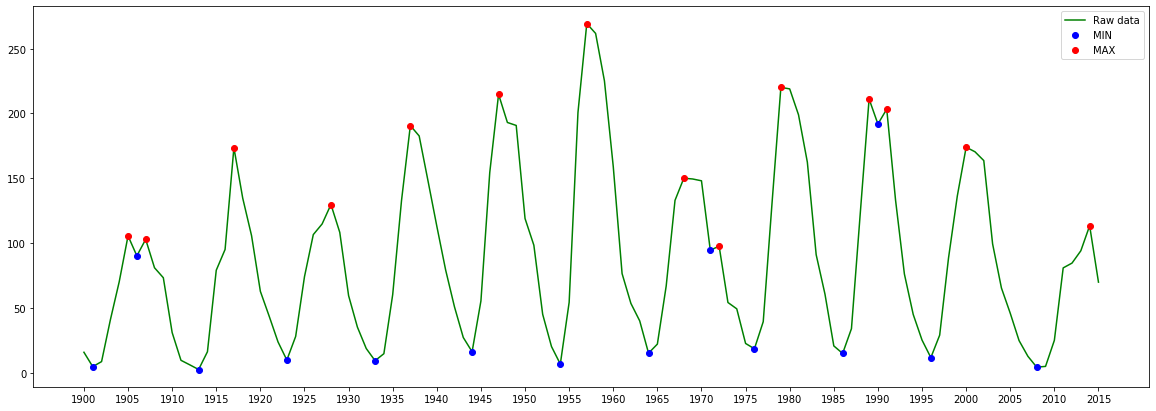

In [5]:
plt.figure(figsize=(20,7))
plt.plot(years, values, 'g', label='Raw data')
plt.plot(mins_years, mins_values, 'bo', label='MIN')
plt.plot(maxs_years, maxs_values, 'ro', label='MAX')
plt.xticks(years[::5])
plt.legend()

pass

Как можно заметить, есть максимумы относящиеся к одной дуге синуса а так же минимумы, которые находятся на уровне максимумов.

Давайте отсечем неинтересующий нас значения, что бы получить более чистые минимумы и максимумы дуг синуса:

In [6]:
mins_years = np.array([])
mins_values = np.array([])

maxs_years = np.array([])
maxs_values = np.array([])

last_max = True

for prev, cur, next, y in zip(values[:-2], values[1:-1], values[2:], years[1:-1]):
    if (cur < next and cur < prev and cur < 50 and last_max):
        mins_years = np.append(mins_years, y)
        mins_values = np.append(mins_values, cur)
        last_max = False
    if (cur > next and cur > prev and not cur < 50 and not last_max):
        maxs_years = np.append(maxs_years, y)
        maxs_values = np.append(maxs_values, cur)
        last_max = True

        
print("Года с минимальной активностью:", mins_years.astype(int))
print("Года с максимальной активностью:", maxs_years.astype(int))

Года с минимальной активностью: [1901 1913 1923 1933 1944 1954 1964 1976 1986 1996 2008]
Года с максимальной активностью: [1905 1917 1928 1937 1947 1957 1968 1979 1989 2000 2014]


Максимумами будут все года, где значение является локальным максимумов, а помимо этого оно больше 50 и последнее записанное значение было минимумом. 
Минимумами будут все года, где значение является локальным максимумов, а помимо этого оно меньше 50 и последнее записанное значение было максимумом. 

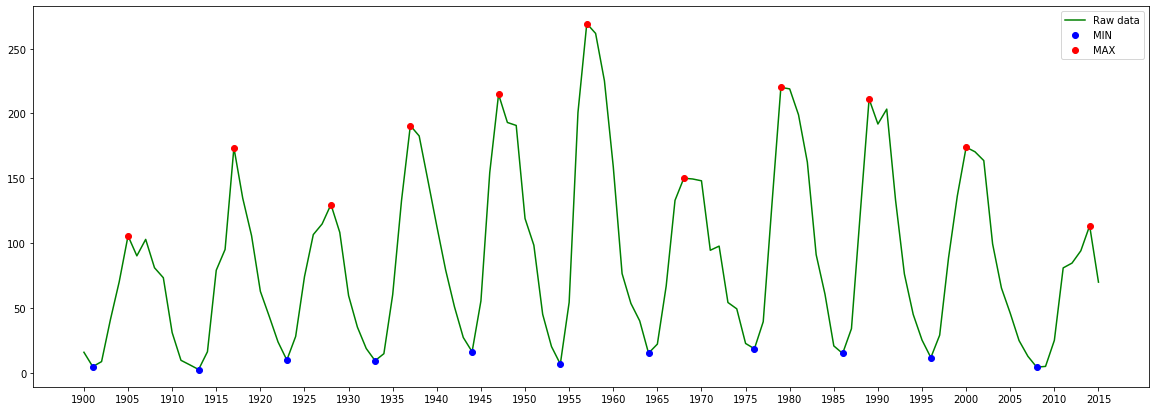

In [7]:
plt.figure(figsize=(20,7))
plt.plot(years, values, 'g', label='Raw data')
plt.plot(mins_years, mins_values, 'bo', label='MIN')
plt.plot(maxs_years, maxs_values, 'ro', label='MAX')
plt.xticks(years[::5])
plt.legend()

pass

Найдем с какой частой колеблются графики. 

Для этого для каждого минимального года найдем его разницу с предыдущим минимальным годом.
После чего найдем среднее геометрическое этих значений

In [8]:
mins_value_sub = mins_years[1:] - mins_years[:-1]
mins_years_sub_lable = [str(f) + " - " + str(s) for f, s in zip(mins_years[:-1].astype(int), mins_years[1:].astype(int))]


min_mean = gmean(mins_value_sub)
print("Средняя разница в годах между минимуми солнечной активности:", min_mean)

Средняя разница в годах между минимуми солнечной активности: 10.663349463976184


Повторим тоже самое для максимумов

In [9]:
maxs_value_sub = maxs_years[1:] - maxs_years[:-1]
maxs_years_sub_lable = [str(f) + " - " + str(s) for f, s in zip(maxs_years[:-1].astype(int), maxs_years[1:].astype(int))]


max_mean = gmean(maxs_value_sub)
print("Средняя разница в годах между максимумами солнечной активности:", max_mean)

Средняя разница в годах между максимумами солнечной активности: 10.82710262271983


Построим графики для этих данных

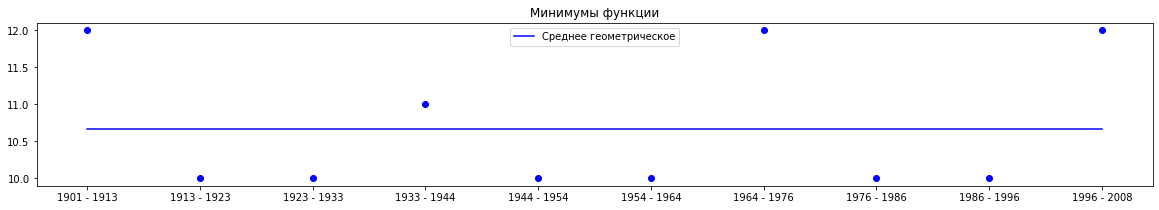

In [10]:
plt.figure(figsize=(20,3))
plt.plot(range(len(mins_value_sub)), mins_value_sub, 'bo')
plt.plot((0, len(mins_value_sub) - 1), (min_mean, min_mean), 'b', label="Среднее геометрическое")

plt.xticks(range(len(mins_years_sub_lable)), mins_years_sub_lable)
plt.legend()
plt.title("Минимумы функции")

pass

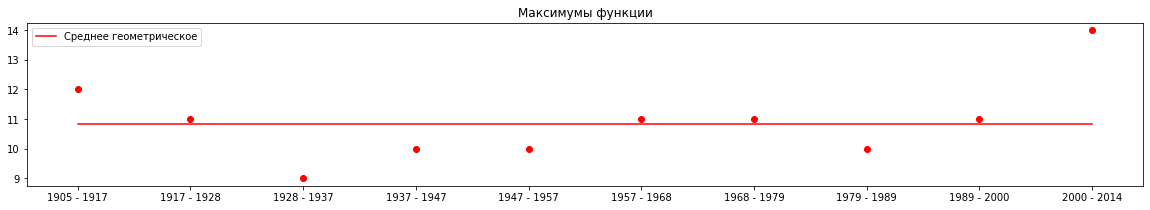

In [11]:
plt.figure(figsize=(20,3))

plt.plot(range(len(maxs_value_sub)), maxs_value_sub, 'ro')
plt.plot((0, len(maxs_value_sub) - 1), (max_mean, max_mean), 'r', label="Среднее геометрическое")

plt.xticks(range(len(maxs_years_sub_lable)), maxs_years_sub_lable)
plt.legend()
plt.title("Максимумы функции")
pass

Можно заметить, что помимо всего прочего, график значений солнечной активности на большом расстоянии выклядит так же как синусоида. Подберем значения и ограничим его


In [12]:
step = 4
years = np.arange(1900, 2016, 1 / step)

sin_max_value = np.sin((years - 1902) * np.pi * 0.01 + np.pi * 1.92) * 135 + 135

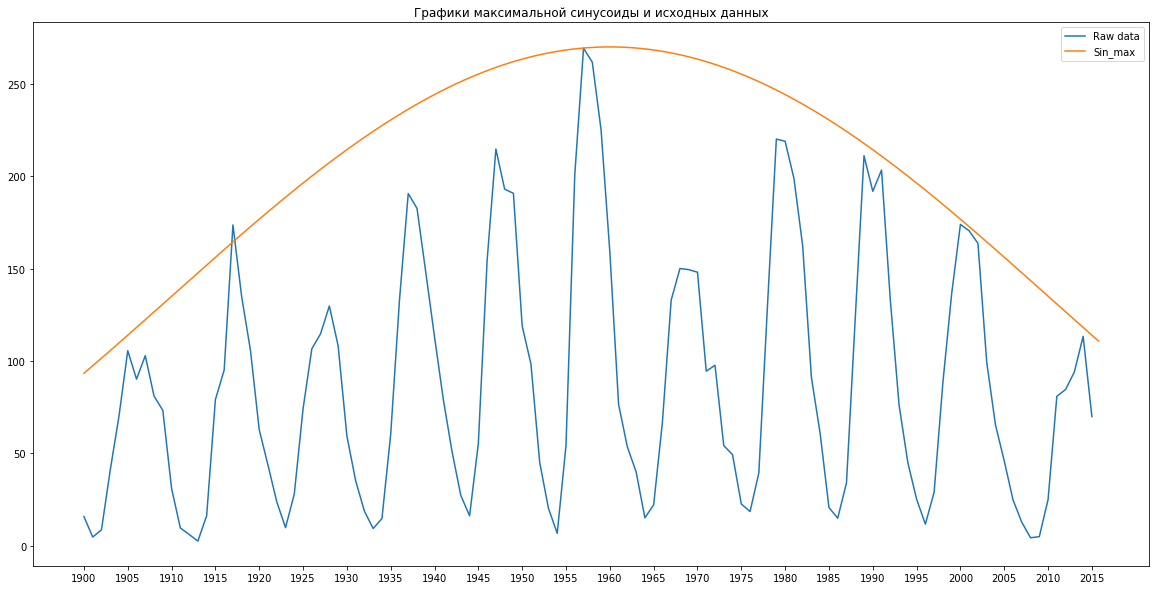

In [13]:
plt.figure(figsize=(20,10))
plt.plot(years[0:step * (2015 - 1900) + 1:step], values, label='Raw data')
plt.plot(years, sin_max_value, label='Sin_max')
plt.xticks(years[::20])

plt.legend()
plt.title("Графики максимальной синусоиды и исходных данных")
pass

Теперь у нас есть максимальное значение колебаний нашего графика - его амплитуда. остальсь только определить частоту

Частота колебаний: 
sin(x) - 2pi


$$ sin(0) = 0 $$

$$ sin(1pi/2) = 1 $$

$$ sin(pi) = 0 $$

$$ sin(3pi/2) = -1 $$

$$ sin(2pi) = 0 $$

Частота колебаний значений солнечной активности: \
~10.66 если свотреть по минимальным пикам \
~10.83 если смотреть по максимальным пикам(На графике можно видеть, что эти пики не до конца точные) 

Для начала значит будем опираться на минимальные пики для расчета колебаний графика \
Частота колебаний = 10.66 (min_mean) \
$$ T = 2pi / средний_минимум $$

Первый минимальный пик солнечной приходится на 1901 год. \
$$ sin(T * (1900 - 1901) + M) = sin(3pi/2) $$
$$ T * (1900 - 1901) + M = 3pi / 2 $$
$$ M = 3pi/2 - T  * (-1) = 3pi/2 + T $$


In [14]:
T = 2 * np.pi / min_mean
M = 1.5 * np.pi + T

sin_value = np.sin(T * (years - 1902) + M) * sin_max_value / 2 + sin_max_value / 2

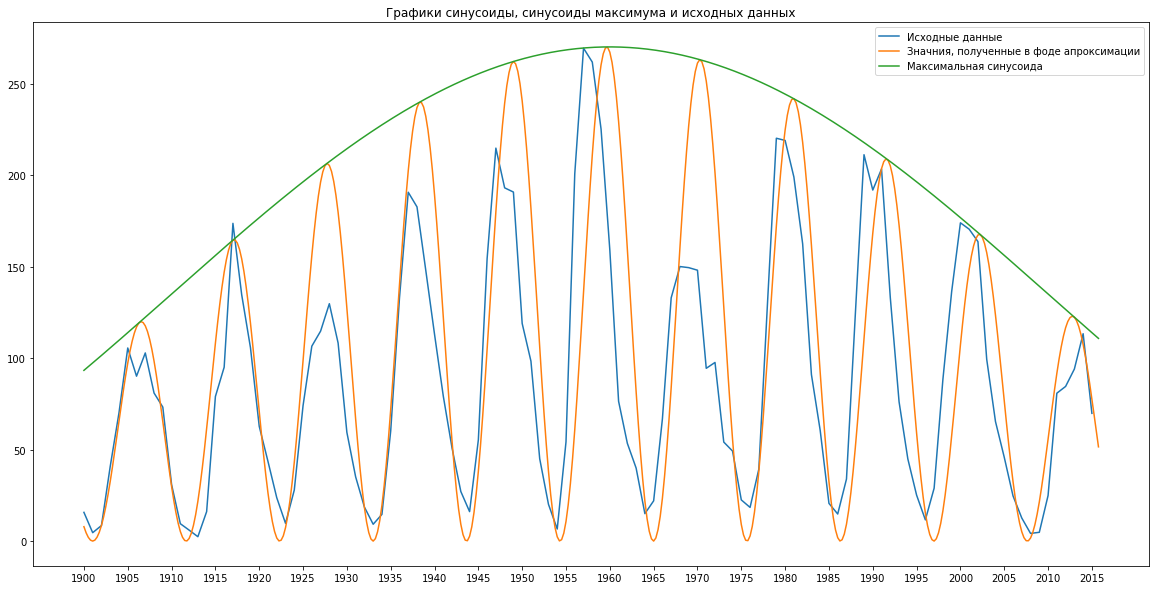

In [15]:
plt.figure(figsize=(20,10))
plt.plot(years[0:step * (2015 - 1900) + 1:step], values, label='Исходные данные')
plt.plot(years, sin_value, label='Значния, полученные в фоде апроксимации')
plt.plot(years, sin_max_value, label='Максимальная синусоида')
plt.xticks(years[::20])

plt.legend()
plt.title("Графики синусоиды, синусоиды максимума и исходных данных")
pass

Увеличим дипозон графика

In [16]:
step = 4
years = np.arange(1900, 2100, 1 / step)

Получим новые данные

In [17]:
sin_max_value = np.sin((years - 1902) * np.pi * 0.01 + np.pi * 1.92) * 135 + 135
sin_value =     np.sin(T * (years - 1902) + M) * sin_max_value / 2 + sin_max_value / 2

Построим график

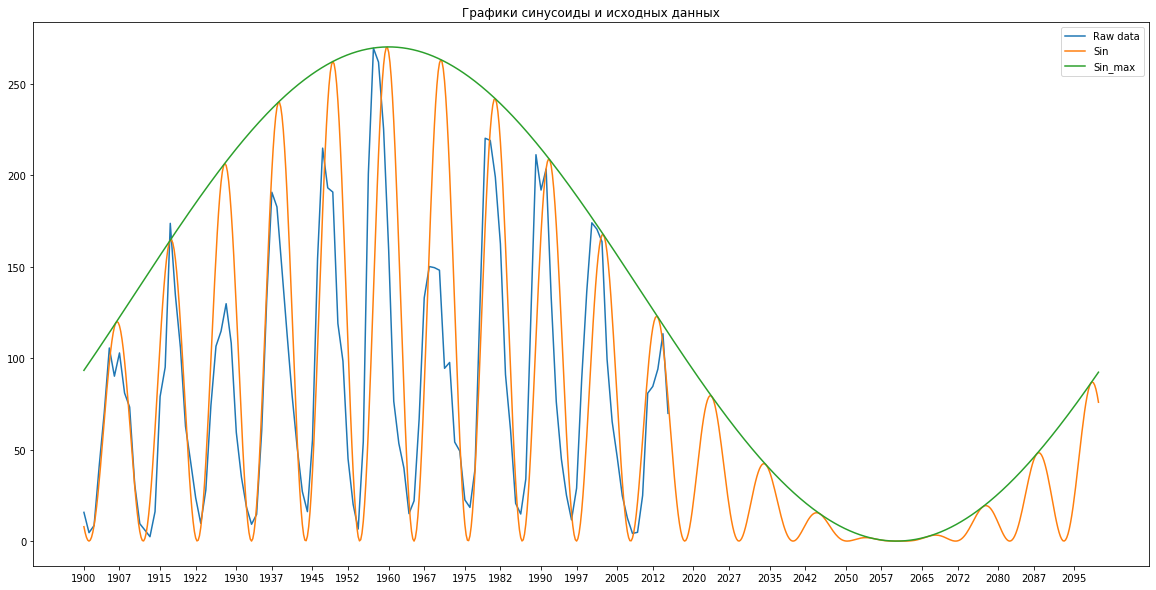

In [18]:
plt.figure(figsize=(20,10))
plt.plot(years[0:step * (2015 - 1900) + 1:step], values, label='Raw data')
plt.plot(years, sin_value, label='Sin')
plt.plot(years, sin_max_value, label='Sin_max')
plt.xticks(years[::5 * (step + 2)].astype(int))

plt.legend()
plt.title("Графики синусоиды и исходных данных")
pass

In [19]:
print("Года с минимумом активности:", mins_years.astype(int))
print("Средний шаг между годами:", min_mean)
print("Следующие пики:", np.arange(mins_years[len(mins_years) - 1], 2100, min_mean)[1:].astype(int))

Года с минимумом активности: [1901 1913 1923 1933 1944 1954 1964 1976 1986 1996 2008]
Средний шаг между годами: 10.663349463976184
Следующие пики: [2018 2029 2039 2050 2061 2071 2082 2093]


Следуюший пик минимальной активности солнца ожидается в 2018

In [20]:
print("Года с максимумом активности:", maxs_years.astype(int))
print("Средний шаг между годами:", max_mean)
print("Следующие пики:", np.arange(maxs_years[len(maxs_years) - 1], 2100, max_mean)[1:].astype(int))

Года с максимумом активности: [1905 1917 1928 1937 1947 1957 1968 1979 1989 2000 2014]
Средний шаг между годами: 10.82710262271983
Следующие пики: [2024 2035 2046 2057 2068 2078 2089]


Следуюший пик активности солнца ожидается в 2024